# Energy derivatives of the $A_4$ model
Here we try to verify the correctness of the implemented model by computing the ground state energy as we sweep across a critical point

In [1]:
# General overview of measurement https://tenpy.readthedocs.io/en/latest/intro/measurements.html
from tenpy.networks.site import SpinSite
from tenpy.networks.mps import TransferMatrix
from tenpy.linalg import np_conserved as npc
import numpy as np
from tenpy.networks.mps import MPS
import h5py
from tenpy.tools import hdf5_io
import glob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
_lamb = []
_E = []
for fname in glob.glob('./results/*mu_2.000.h5'):
    with h5py.File(fname) as f:
        data = hdf5_io.load_from_hdf5(f)
        _E.append(data['energy'])
        _lamb.append(data['simulation_parameters']['model_params']['lamb'])
        del data

In [4]:
print(len(_lamb),len(_E))
lamb = np.array(_lamb)
E = np.array(_E)
lamb = np.sort(lamb)
E = E[np.argsort(_lamb)]

159 159


Text(0, 0.5, 'Ground state energy E')

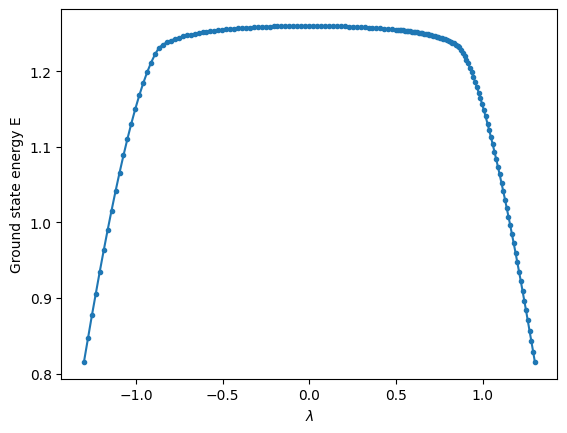

In [14]:
plt.plot(lamb,E,marker='.')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'Ground state energy E')

In [6]:
dEdlamb = (E[1:]-E[:-1])/(lamb[1:]-lamb[:-1])

Text(0.5, 0, '$\\lambda$')

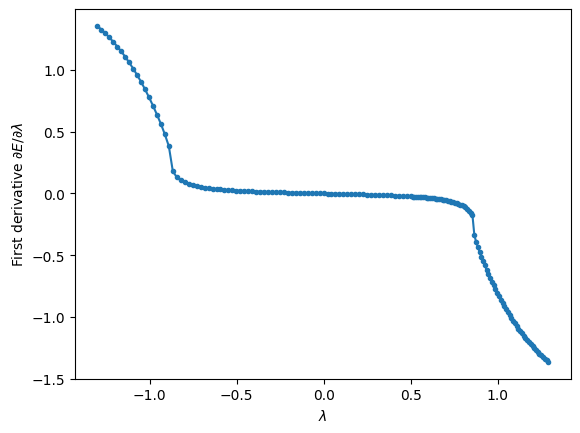

In [12]:
plt.plot(lamb[:-1],dEdlamb,marker='.')
plt.ylabel(r'First derivative $\partial E/\partial \lambda$')
plt.xlabel(r'$\lambda$')

In [8]:
d2Edlamb2 = (dEdlamb[1:]-dEdlamb[:-1])/(lamb[2:]-lamb[:-2])

Text(0.5, 0, '$\\lambda$')

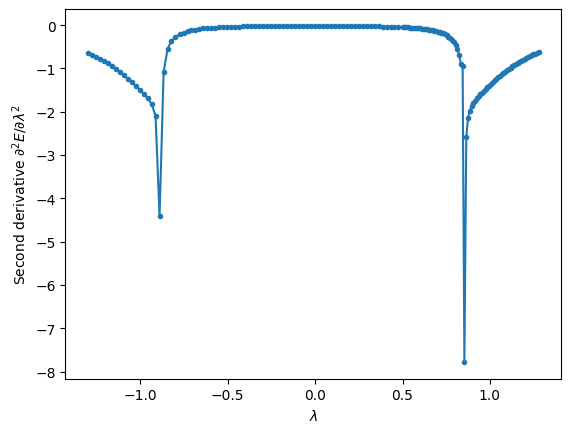

In [13]:
plt.plot(lamb[:-2],d2Edlamb2,marker='.')
plt.ylabel(r'Second derivative $\partial^2 E/\partial \lambda^2$')
plt.xlabel(r'$\lambda$')

## Comparison with the paper referred 
This is to reproduce Fig 2 of the linked paper (https://arxiv.org/pdf/1604.00037)
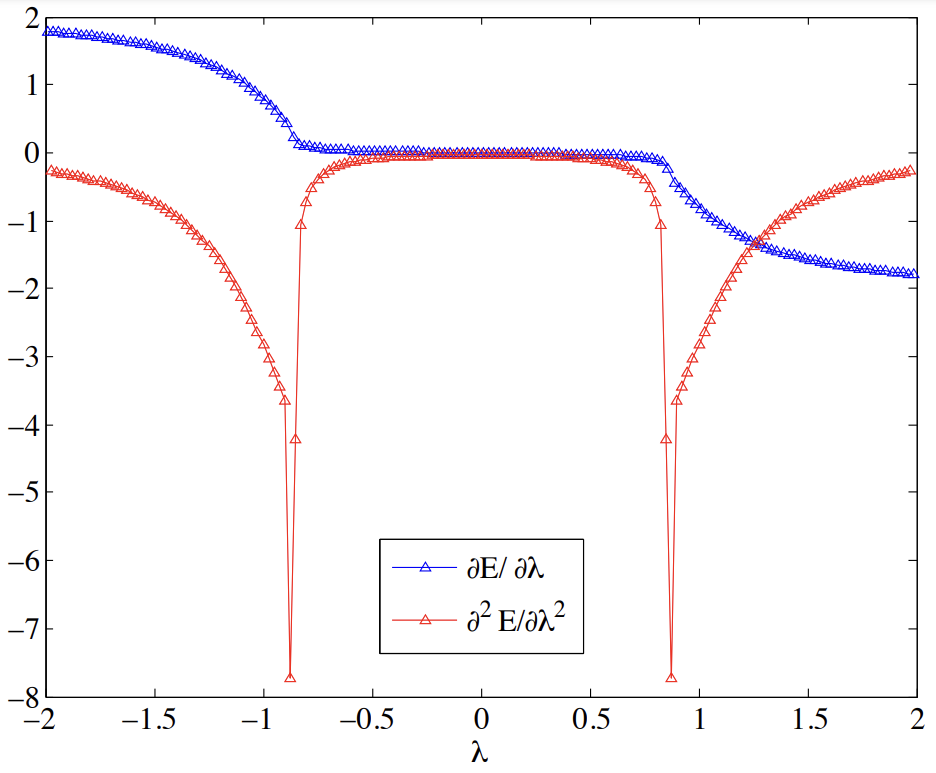